<a href="https://colab.research.google.com/github/vaishnavisharma6/Solar-still-design-analysis/blob/main/Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import io
%config InlineBackend.figure_format = 'svg'


In [ ]:
url = 'https://github.com/vaishnavisharma6/Solar-still-design-analysis/raw/main/DATA.csv'
df = pd.read_csv(url)
data = shuffle(df)
print(data)

     Evaporative Water temperature\n(0C )  Glass cover temperature (0C)  \
91                                67.0221                       63.2920   
66                                27.6535                       23.9699   
10                                16.7475                       13.0309   
57                                57.9542                       54.2587   
1                                 16.9102                       13.1670   
..                                    ...                           ...   
92                                69.7560                       66.0221   
43                                28.0000                       24.3099   
61                                54.1807                       50.4957   
13                                33.1062                       29.3941   
106                               32.8408                       29.1686   

     Ambient temperature (0C)  Solar intensity (kw/ m2)  Month Number  \
91                       3

In [ ]:
N = data.shape[0]
Ntrain = 101
Nvalid = 15
Ntest = N - Ntrain - Nvalid

In [ ]:
data = data.to_numpy()
Xtrain = data[0:Ntrain, 0:5]
Ytrain = data[0:Ntrain, 5]
Xvalid = data[Ntrain: Ntrain+Nvalid, 0:5]
Yvalid = data[Ntrain: Ntrain+Nvalid, 5]
Xtest = data[Ntrain+Nvalid:-1, 0:5]
Ytest = data[Ntrain+Nvalid: -1, 5]

In [ ]:
class Trainingplot(tf.keras.callbacks.Callback):
  def on_train_begin(self, logs = {}):
    self.losses = []
    self.val_losses = []
    self.logs = []
  def on_epoch_end(self, epoch, logs = {}):
    self.logs.append(logs)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))  

    if epoch >1 and epoch%500 == 0:                                                             #callback function
       clear_output(wait = True)
       N = np.arange(0, len(self.losses))  

       plt.figure()
       plt.semilogy(N, self.losses, label = 'Train_loss')
       plt.semilogy(N, self.val_losses, label = 'Validation loss')
       plt.title('After epoch = {}'.format(epoch))
       plt.xlabel('Epoch #')
       plt.ylabel('Loss')
       plt.legend()
       plt.show()
      


In [ ]:
model = Sequential()
model.add(Dense(512, input_shape = (5,), activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               3072      
                                                                 
 dense_16 (Dense)            (None, 128)               65664     
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 79,105
Trainable params: 79,105
Non-trainable params: 0
_________________________________________________________________


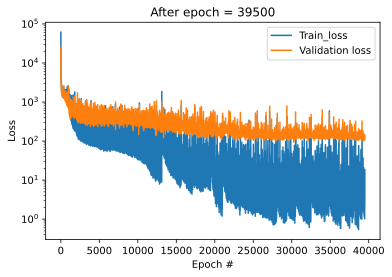

In [ ]:
plot_losses = Trainingplot()
model.fit(Xtrain, Ytrain, epochs = 40000, verbose = 0, batch_size = 32, shuffle = True, validation_data = (Xvalid, Yvalid), callbacks = [plot_losses])

4/4 [==============================] - 0s 3ms/step - loss: 9.5335 - mse: 9.5335
Train accuracy: 9.533461570739746
1/1 [==============================] - 0s 20ms/step - loss: 119.0622 - mse: 119.0622
Validation accuracy: 119.06221008300781
1/1 [==============================] - 0s 19ms/step - loss: 6.9065 - mse: 6.9065
Test error: 6.906514644622803
1/1 [==============================] - 0s 17ms/step


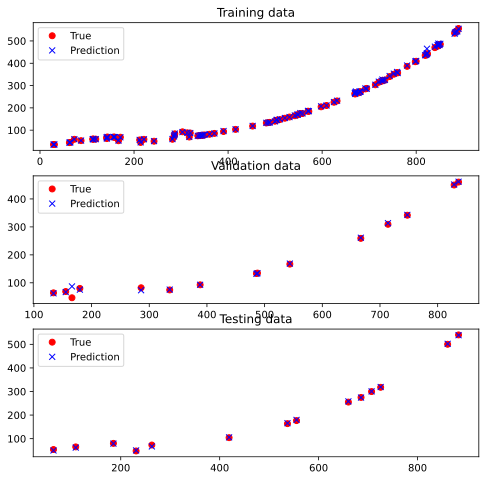

In [ ]:
train_loss, train_mse = model.evaluate(Xtrain, Ytrain)
print('Train accuracy:', train_mse)
valid_loss, valid_mse = model.evaluate(Xvalid, Yvalid)
print('Validation accuracy:', valid_mse)
test_loss, test_mse = model.evaluate(Xtest, Ytest)
print('Test error:', test_mse)

plt.figure(figsize=(8,8))
plt.subplot(3,1,1)
plt.plot(Xtrain[:,3],Ytrain,'o',color='red',label='True')
plt.plot(Xtrain[:,3],model.predict(Xtrain),'x',color='blue',label='Prediction')
plt.title('Training data')
plt.legend()

plt.subplot(3,1,2)
plt.plot(Xvalid[:,3],Yvalid,'o',color='red',label='True')
plt.plot(Xvalid[:,3],model.predict(Xvalid),'x',color='blue',label='Prediction')
plt.title('Validation data')
plt.legend()

plt.subplot(3,1,3)
plt.plot(Xtest[:,3],Ytest,'o',color='red',label='True')
plt.plot(Xtest[:,3],model.predict(Xtest),'x',color='blue',label='Prediction')
plt.title('Testing data')
plt.legend()

plt.show()
